In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("ggplot")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10
)

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False
)
%config InlineBackend.figure_format = 'retina'


# annotations
def seasonal_plot(X, y, period, freq, ax=None):
  if ax is None:
    _, ax = plt.subplots()
  palette = sns.color_palette("husl", n_colors=X[period].unique())
  ax = sns.lineplot(
      x=freq,
      y=y,
      hue=period,
      data=X,
      ci=False,
      ax=ax,
      palette=palette,
      legend=False
  )
  ax.set_title(f"Seasonal Plot ({period}/{freq})")
  for line, name in zip(ax.lines, X[period].unique()):
    y_ = line.get_ydata()[-1]
    ax.annotate(
        name,
        xy=(1, y_),
        xytext=(6, 0),
        color=line.get_color(),
        xycoords=ax.get_yaxis_transform(),
        textcoords="offset points",
        size=14,
        va="center"
    )
  return ax


def plot_periodogram(ts, detrend="linear", ax=None):
  from scipy.signal import periodogram
  fs = pd.Timedelta("365D") / pd.Timedelta("1D")
  frequencies, spectrum = periodogram(
      ts,
      fs=fs,
      detrend=detrend,
      window="boxcar",
      scaling='spectrum'
  )
  if ax is None:
    _, ax = plt.subplots()
  ax.step(frequencies, spectrum, color='purple')
  ax.set_xscale("log")
  ax.set_xticks([1, 2, 4, 6, 12, 24, 52, 104])
  ax.set_xtickslabels(
      [
          "Annual (1)",
          "Semiannual (2)",
          "Quarterly (4)",
          "Bimonthly (6)",
          "Monthly (12)",
          "Biweekly (26)",
          "Weekly (52)",
          "Semiweekly (104)"
      ],
        rotation=30

  )
  ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
  ax.set_ylabel("Variance")
  ax.set_title("Periodogram")
  return ax


tunnel = pd.read_csv("/content/tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")

In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("ggplot")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


#data_dir = Path("../input/ts-course-data")
tunnel = pd.read_csv("/content/tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")

<Axes: title={'center': 'Seasonal Plot (year/dayofyear)'}, xlabel='dayofyear', ylabel='NumVehicles'>

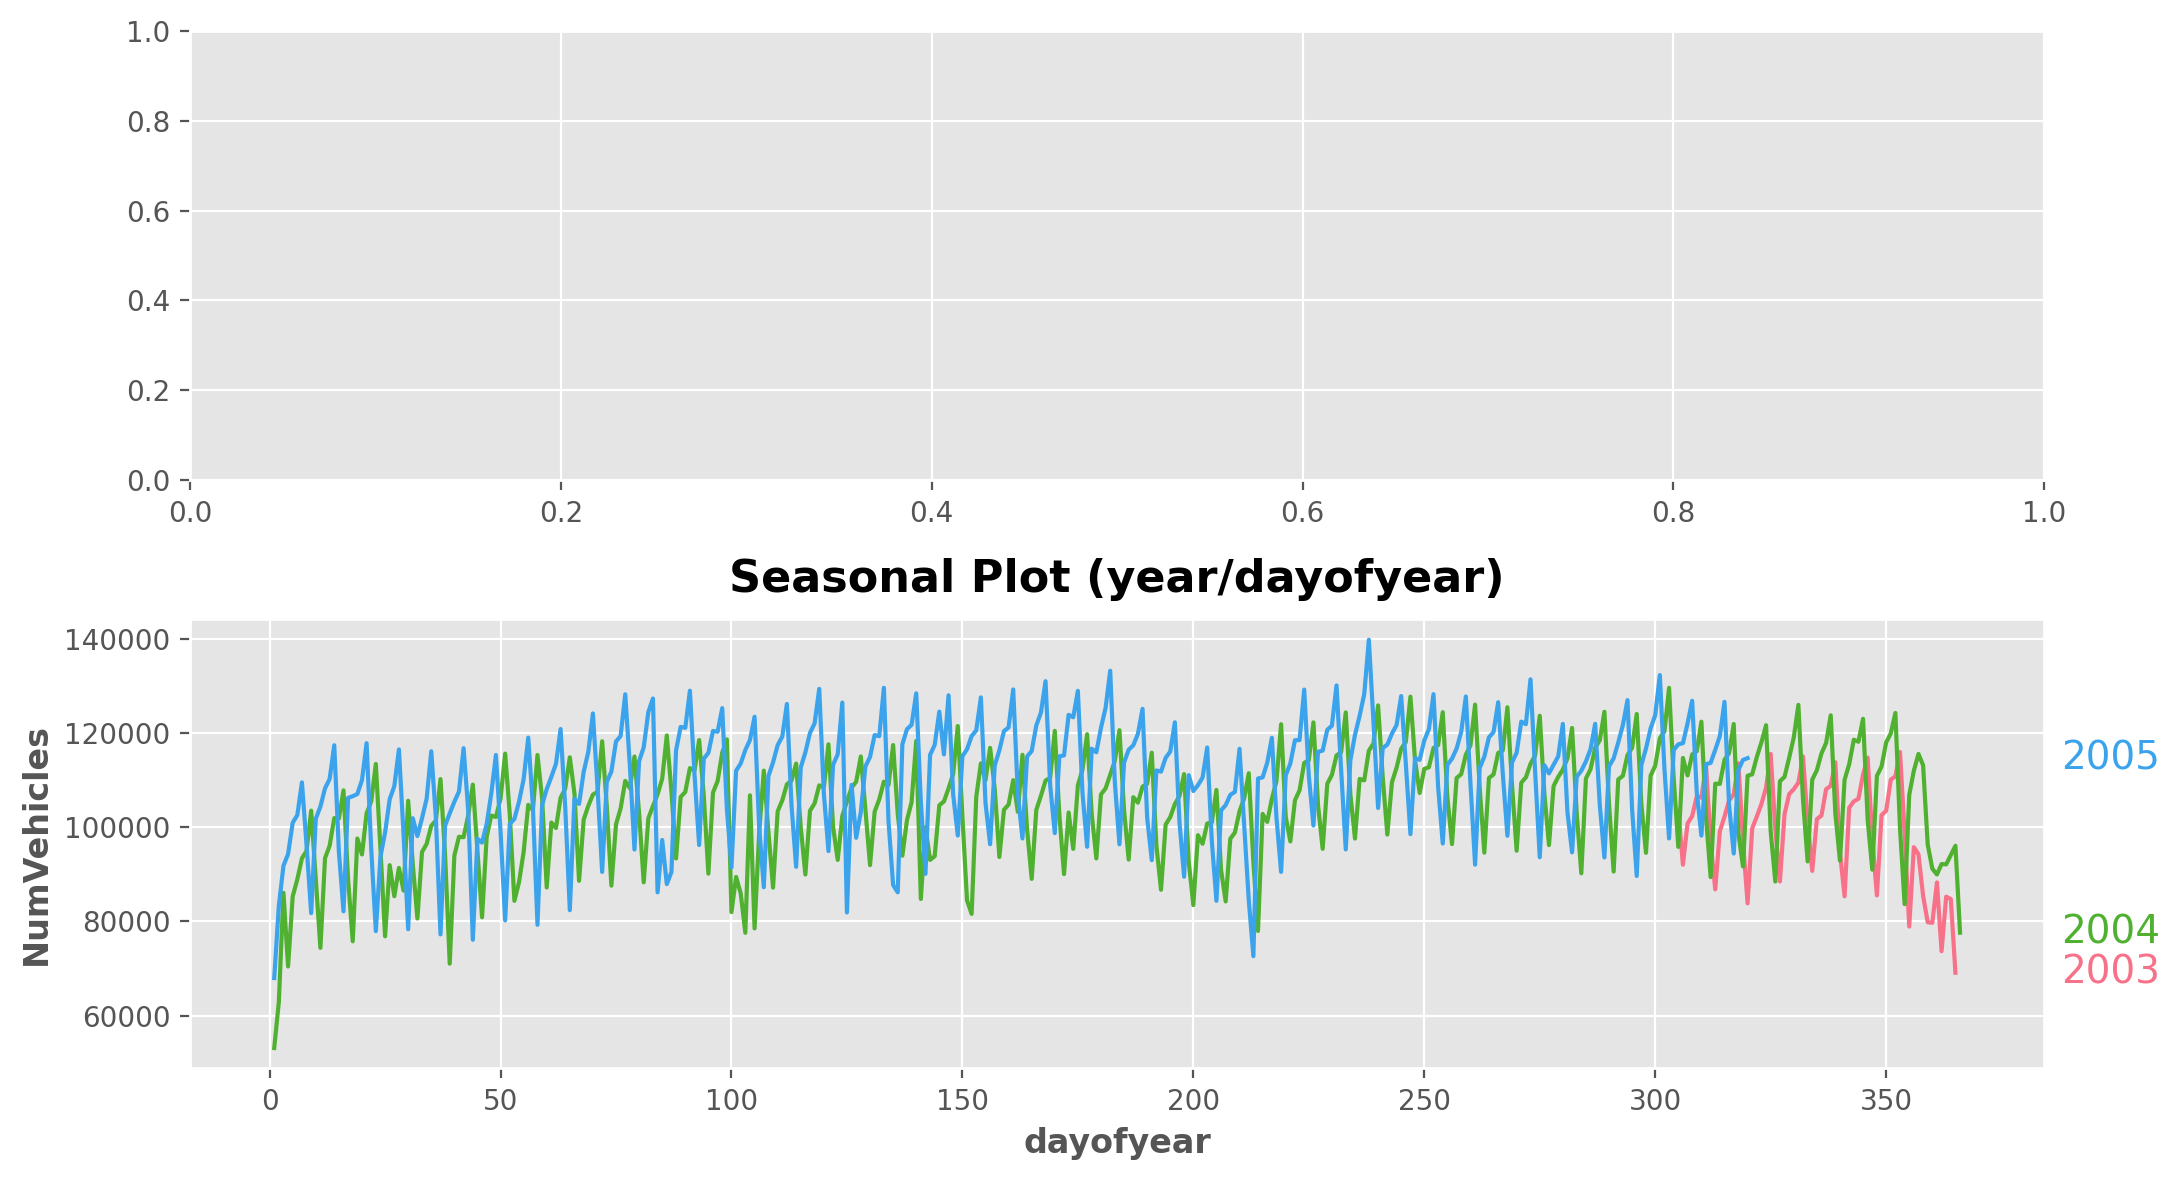

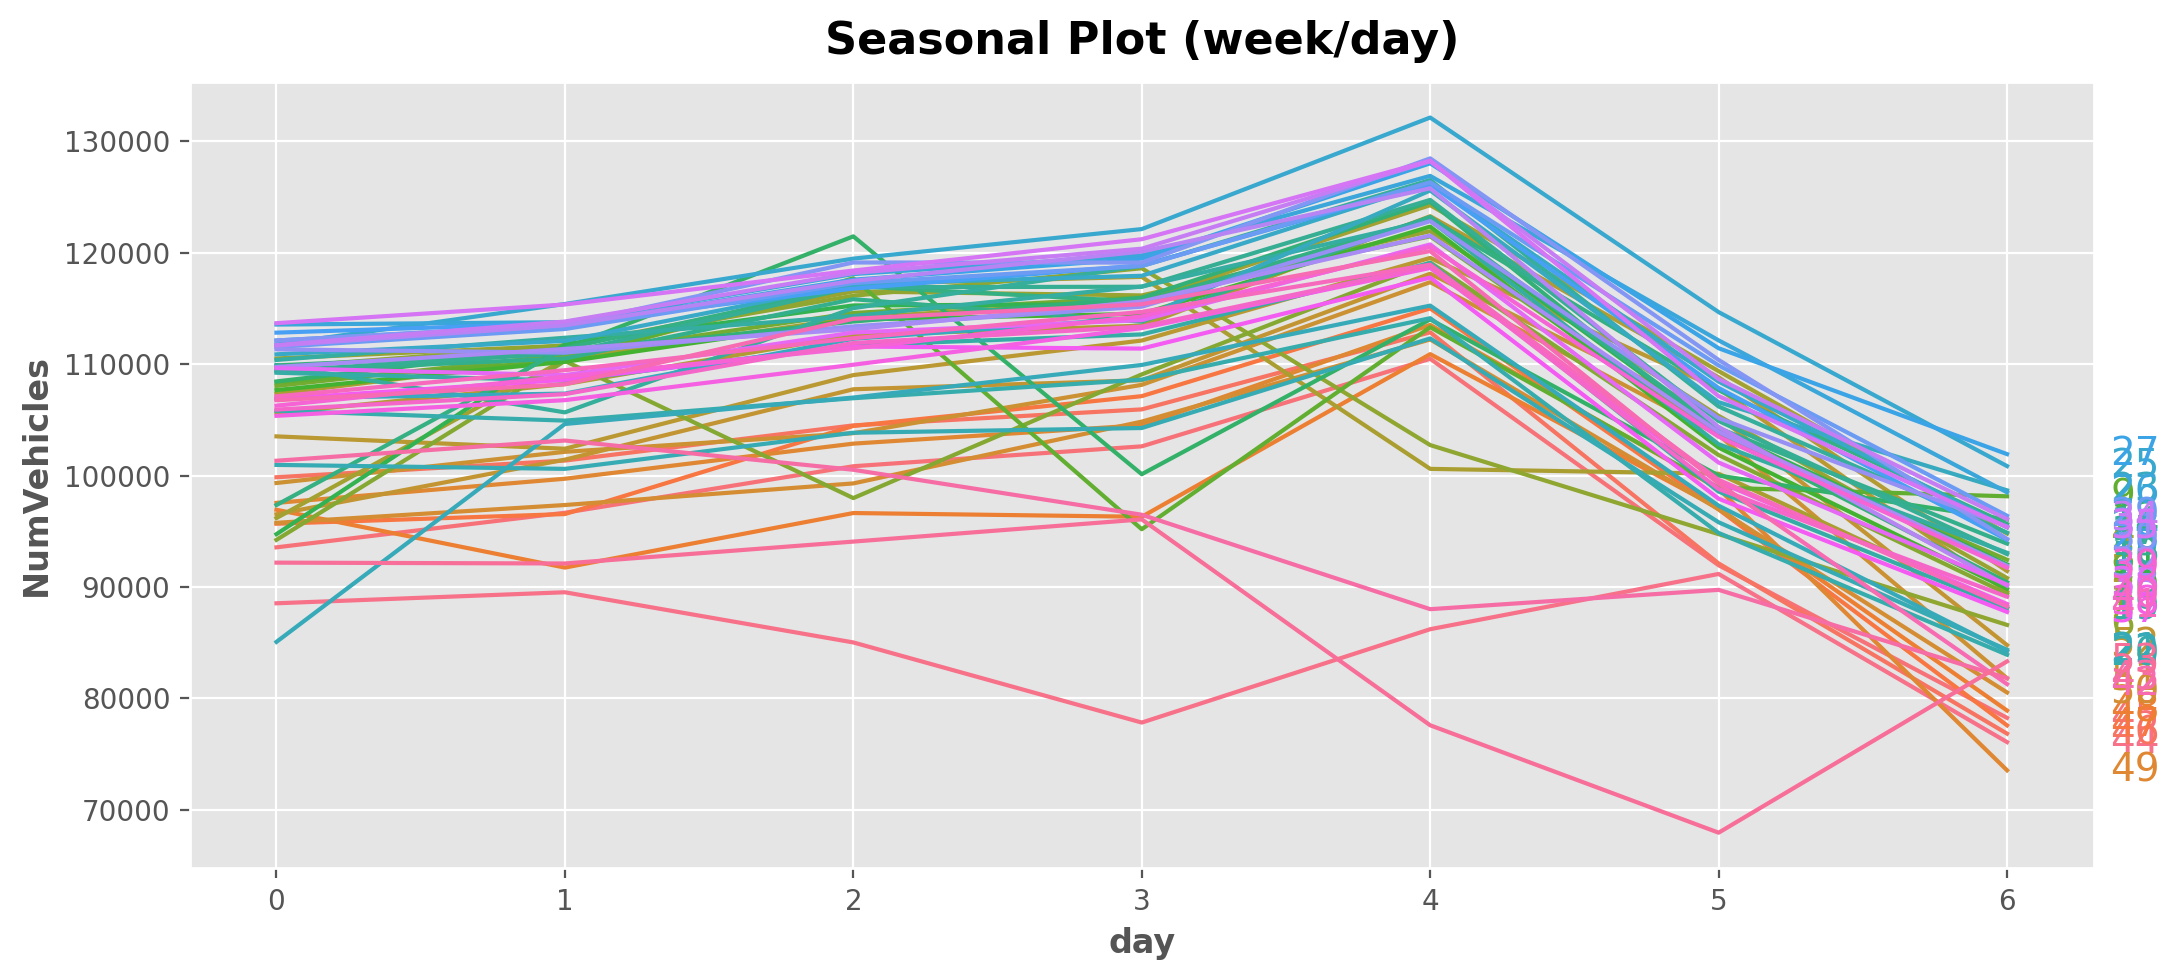

In [ ]:
X = tunnel.copy()

# days within a week
X["day"] = X.index.dayofweek  # the X-axis (freq)
X["week"] = X.index.week     # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1)

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

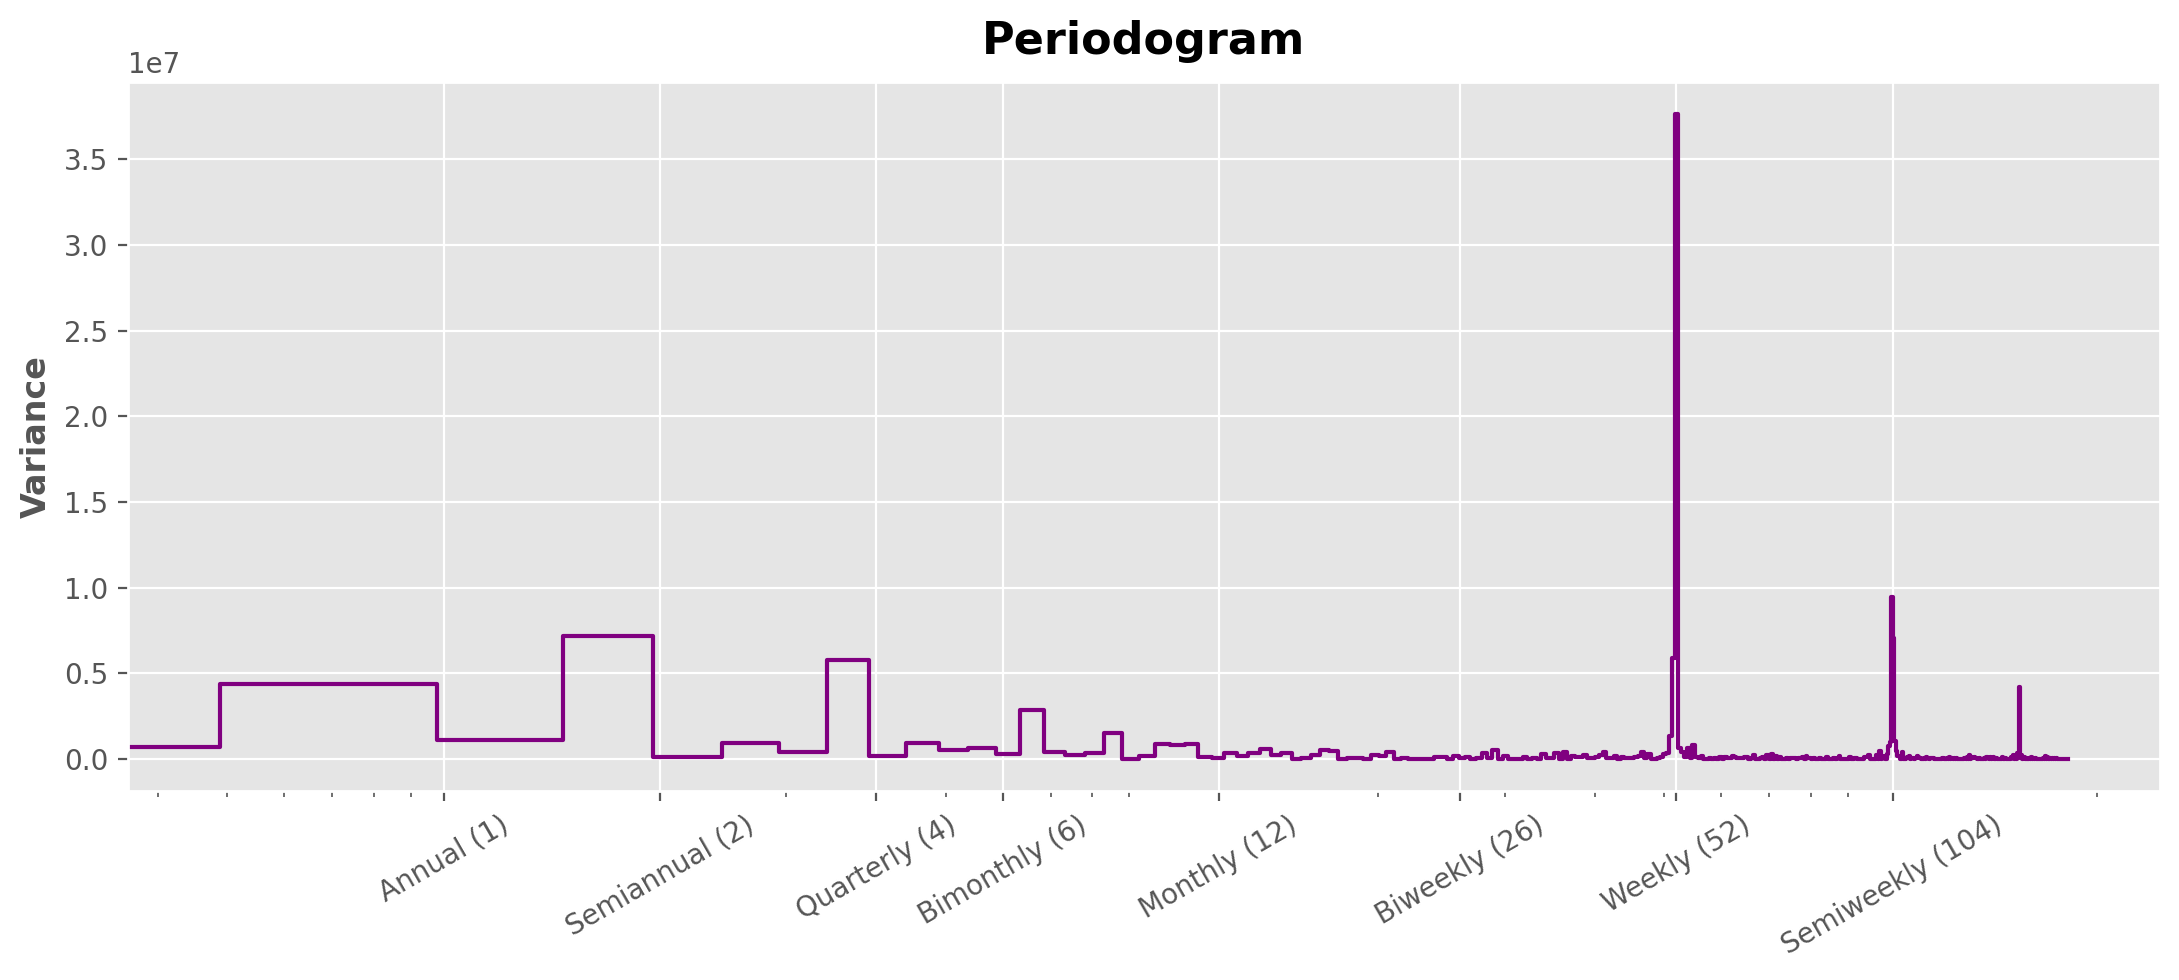

In [ ]:
plot_periodogram(tunnel.NumVehicles)

In [ ]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10)

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True
)

X = dp.in_sample()   # Creates features for dates in tunnel.index

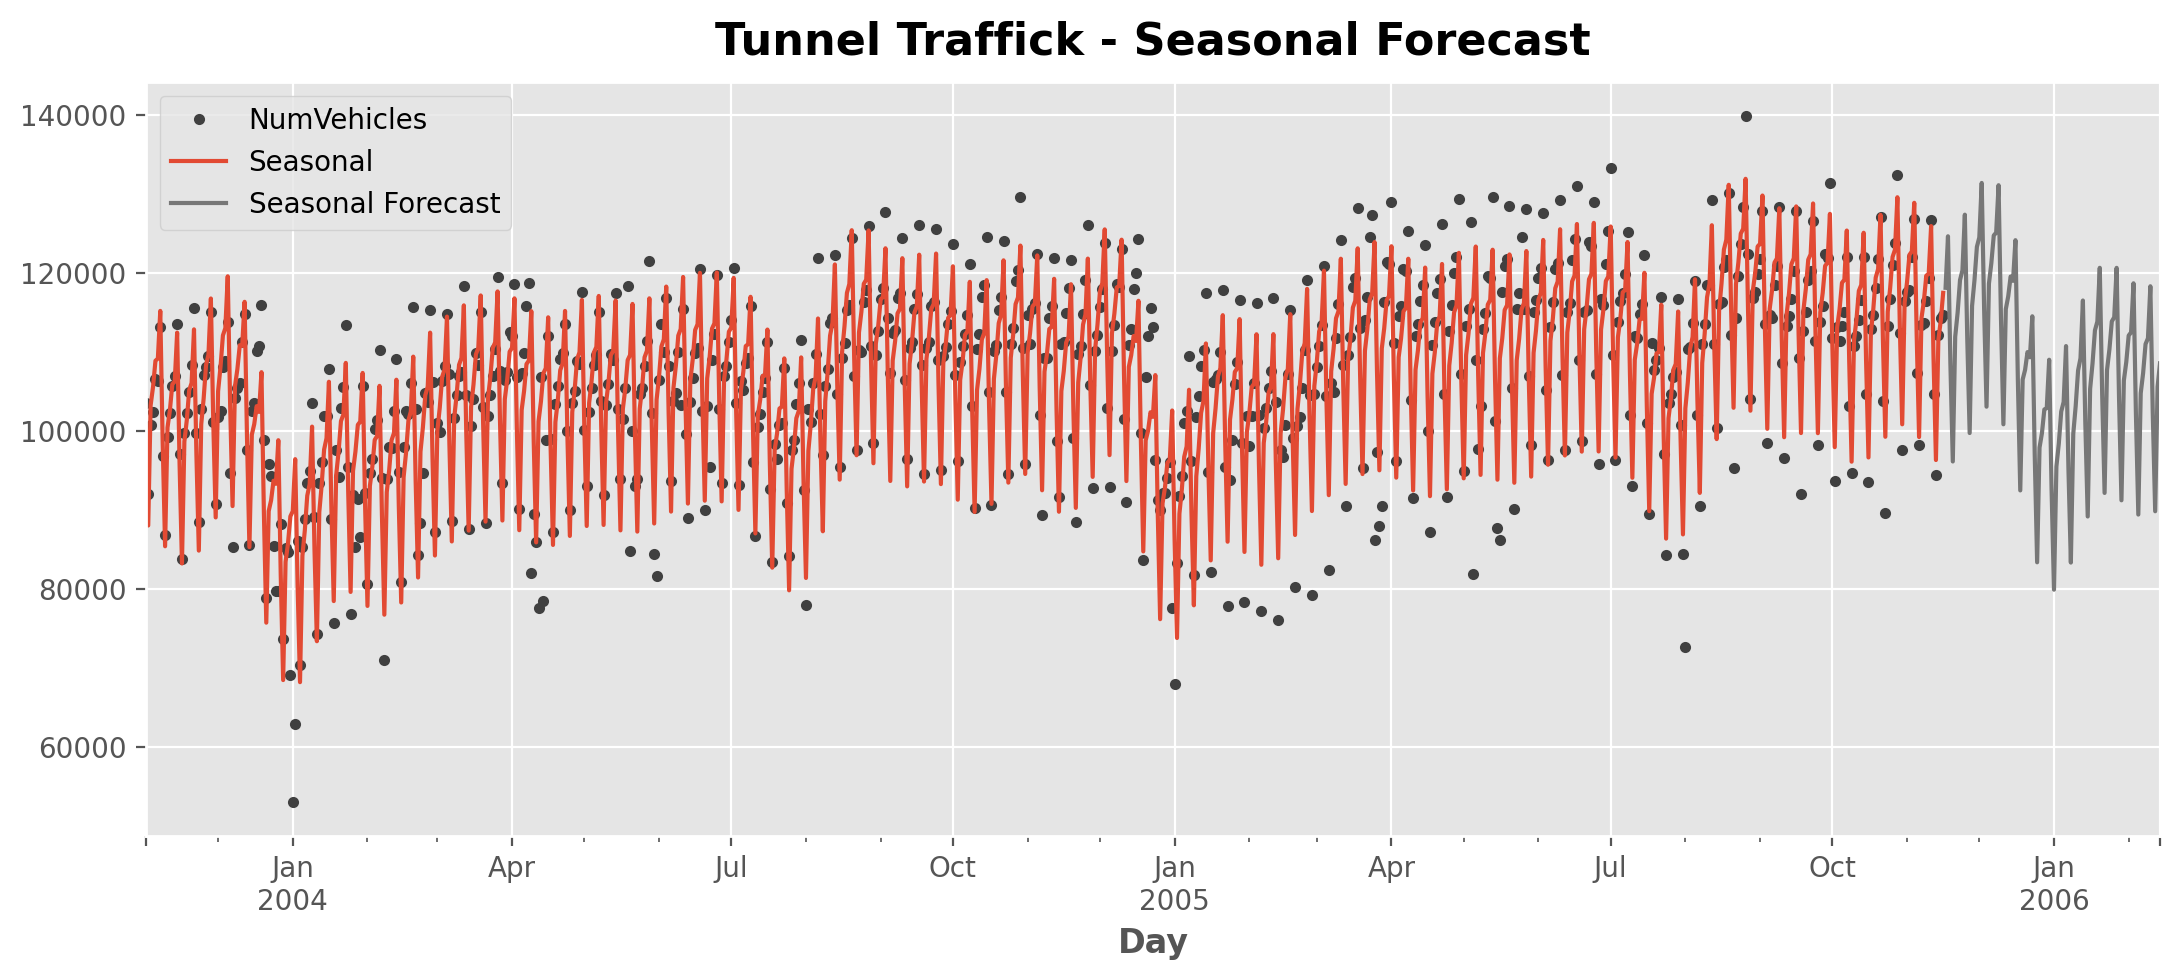

In [ ]:
y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=90)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)


ax = y.plot(color='0.25', style=".", title="Tunnel Traffick - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')

#1

Seasonality in a time series refers to predictable and recurring patterns that happen at regular time intervals, such as daily, weekly, monthly, or yearly. These patterns are often influenced by natural phenomena (like temperature changes across seasons) or human activities (like increased shopping during holidays), causing the average values of the series to rise and fall in a consistent, cyclical way.

🔹 1. Indicator Variables (a.k.a. Dummy Variables)
Best for short seasonal cycles with few distinct time points, like days of the week.

Example: If you have daily data and want to model weekly seasonality, you can create 7 binary variables — one for each day.

Simple and effective when the number of seasons is small.

🧠 Think: "Is it Monday? Tuesday?..." — use 1 or 0 for each.

🔹 2. Fourier Features
Best for longer seasonal cycles with many distinct time points, like daily data with yearly seasonality (365 points).

Uses sine and cosine functions to model smooth, continuous cycles.

More efficient than creating 365 indicator variables — it captures complex seasonality with just a few terms.

🧠 Think: "Capture the wave-like pattern over the year with math."

🔹 1. Indicator Variables (a.k.a. Dummy Variables)
Best for short seasonal cycles with few distinct time points, like days of the week.

Example: If you have daily data and want to model weekly seasonality, you can create 7 binary variables — one for each day.

Simple and effective when the number of seasons is small.

🧠 Think: "Is it Monday? Tuesday?..." — use 1 or 0 for each.

🔹 2. Fourier Features
Best for longer seasonal cycles with many distinct time points, like daily data with yearly seasonality (365 points).

Uses sine and cosine functions to model smooth, continuous cycles.

More efficient than creating 365 indicator variables — it captures complex seasonality with just a few terms.

🧠 Think: "Capture the wave-like pattern over the year with math."

#2

Just as a moving average plot helps us see the trend (long-term direction) in a time series, a seasonal plot helps us uncover seasonal patterns — repeating behaviors at regular intervals.

A seasonal plot works by grouping data by a specific time period (like days of the week or months of the year) and plotting each group over that period. This lets you compare how the values behave across different cycles. For example, plotting daily Wikipedia views over each week can show whether views consistently spike on certain days (like Mondays) and drop on others (like Saturdays).

🧠 Key Idea:
Instead of viewing the time series as one long line, a seasonal plot "stacks" the data by season, making it easier to spot repeated patterns across time.

Let me know if you’d like to create one using your own data!

#3

Seasonal indicators are binary (0 or 1) features that help your model understand recurring patterns in time series data — like different behaviors on different days of the week.

🔹 How it works:
Treat the season (e.g., day of the week) as a categorical variable.

Apply one-hot encoding, which creates a separate column (called a “dummy” variable) for each category.

Each column has a 1 when that day is present and 0 otherwise.

So for weekly seasonality, you'll get one column each for Tuesday through Sunday (six total), and leave out Monday to avoid a dummy variable trap (which causes redundancy in linear regression).

📌 Why drop one?
Linear models need to avoid perfect multicollinearity (when one feature can be predicted from others).

Dropping one day (like Monday) means the model treats it as a baseline and compares other days to it.

🧠 Example:
If you have:


`Day       Mon  Tue  Wed  Thu  Fri  Sat  Sun`

`Tuesday    0    1    0    0    0    0    0`

`Friday    0    0    0    0    1    0    0`


#4

if  we add a set of these sine / cosine curves to our training data, the linear regression algorithm will figure out the weights that will fit the seasonal component in the target series. The figure illustrates how linear regression used four Fourier pairs to model the annual seasonality in the Wiki Trigonometry series.

When modeling long seasonal cycles (like annual seasonality in daily data), using seasonal indicators (one-hot encoding each day) would create hundreds of features — one for each day of the year. This not only increases computation time, but also raises the risk of overfitting because the model might start memorizing noise.

Instead, Fourier features use smooth sine and cosine waves to capture the main seasonal pattern with just a few pairs of features (like 4 sine/cosine pairs = 8 features). This method models the overall shape of the seasonality (the “main effect”) without needing to represent every tiny fluctuation, making it more efficient and generalizable.